In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
!apt-get update
!apt-get install -y libsndfile1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [673 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,440 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.c

In [80]:
ravdess = '/content/drive/My Drive/DATASET_1'
files_lis_dir = os.listdir(ravdess)
print(files_lis_dir)
print("Done")


['Actor_24', 'Actor_14', 'Actor_19', 'Actor_17', 'Actor_16', 'Actor_18', 'Actor_20', 'Actor_22', 'Actor_21', 'Actor_23', 'Actor_15', 'Actor_13', 'Actor_06', 'Actor_09', 'Actor_08', 'Actor_10', 'Actor_11', 'Actor_05', 'Actor_04', 'Actor_12', 'Actor_07', 'Actor_03', 'Actor_01', 'Actor_02']
Done


In [86]:
#for ravdess dataset, storing path and emotion
file_path = []
file_emotion = []
for f in files_lis_dir:
  actor = os.listdir(os.path.join(ravdess, f))
  for a in actor: #for all audio files
    audio = a.split('.')[0].split('-')
    file_emotion.append(int(audio[2]))
    file_path.append(ravdess + f + '/' + a)
print("Cell executed")
print("size of file path : ", len(file_path), "and file emotion: ", len(file_emotion))

Cell executed
size of file path :  1440 and file emotion:  1440


In [85]:
# for i in range(24):
#   print(actor[i])
# for i in range( 10):
#   print(store_emotion[i])

# print("File path : ", store_path[1])

In [87]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',8:'surprise'},inplace=True)
print("cell exec")

cell exec


In [64]:
print(ravdess_df.head())
print("---------------")
print(ravdess_df.tail())
print("----------")
print(ravdess_df['Emotions'].value_counts())


Empty DataFrame
Columns: [Emotions, Path]
Index: []
---------------
Empty DataFrame
Columns: [Emotions, Path]
Index: []
----------
Series([], Name: Emotions, dtype: int64)


In [65]:
#second dataset
crema ='/content/drive/My Drive/DATASET_2_CREMA'
# files = os.listdir(crema)
# num_files = len(files)
# print(num_files)

In [88]:
crema_dir_list = os.listdir(crema)
file_path = []
file_emotion = []

for i in crema_dir_list:
    # storing file paths
    file_path.append(crema + i)
    # storing file emotions
    part=i.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)

crema_df.head()
print(crema_df.Emotions.value_counts())
print("Cell executed")
print("size of file path : ", len(file_path), "and file emotion: ", len(file_emotion))

fear       1188
disgust    1187
sad        1187
angry      1187
happy      1186
neutral    1015
Name: Emotions, dtype: int64
Cell executed
size of file path :  6950 and file emotion:  6950


In [67]:
#third dataset
savee ='/content/drive/My Drive/DATASET_3_SAVEE/ALL'
savee_dl = os.listdir(savee)



In [68]:
# files = os.listdir(savee)
# for entry in files:

#     entry_path = os.path.join(savee, entry)
#     if os.path.isdir(entry_path):
#         subfiles = os.listdir(entry_path)
#         print(f"Number of files in '{entry}': {len(subfiles)}")
# print("done")

In [90]:
file_path = []
file_emotion = []
for i in savee_dl:
    file_path.append(savee + i)
    part = i.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
savee_df = pd.concat([emotion_df, path_df], axis=1)
savee_df.head()
print(savee_df['Emotions'].value_counts())
print("Cell executed")
print("size of file path : ", len(file_path), "and file emotion: ", len(file_emotion))

neutral     120
fear         60
happy        60
angry        60
surprise     60
sad          60
disgust      60
Name: Emotions, dtype: int64
Cell executed
size of file path :  480 and file emotion:  480


In [70]:
#fourth dataset
tess = '/content/drive/My Drive/tess_moved'
tess_dl = os.listdir(tess)

In [91]:
file_emotion = []
file_path = []
for dir in tess_dl:
    files = os.listdir(os.path.join(tess, dir))
    for file in files:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        full_path = os.path.join(tess, dir, file)
        file_path.append(full_path)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
tess_df = pd.concat([emotion_df, path_df], axis=1)
print(tess_df.head())
print(tess_df.Emotions.value_counts())
print("Cell executed")
print("size of file path : ", len(file_path), "and file emotion: ", len(file_emotion))


  Emotions                                               Path
0  neutral  /content/drive/My Drive/tess_moved/YAF_neutral...
1  neutral  /content/drive/My Drive/tess_moved/YAF_neutral...
2  neutral  /content/drive/My Drive/tess_moved/YAF_neutral...
3  neutral  /content/drive/My Drive/tess_moved/YAF_neutral...
4  neutral  /content/drive/My Drive/tess_moved/YAF_neutral...
neutral     400
surprise    400
sad         400
angry       400
fear        400
disgust     400
happy       400
Name: Emotions, dtype: int64
Cell executed
size of file path :  2800 and file emotion:  2800


In [92]:
#combining all
data_path = pd.concat([ravdess_df, crema_df, tess_df, savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
print(data_path.head())
print("check")
print(data_path['Emotions'].value_counts())

   Emotions                                               Path
0     happy  /content/drive/My Drive/DATASET_1Actor_24/03-0...
1  surprise  /content/drive/My Drive/DATASET_1Actor_24/03-0...
2   disgust  /content/drive/My Drive/DATASET_1Actor_24/03-0...
3   neutral  /content/drive/My Drive/DATASET_1Actor_24/03-0...
4   neutral  /content/drive/My Drive/DATASET_1Actor_24/03-0...
check
fear        1840
disgust     1839
sad         1839
angry       1839
happy       1838
neutral     1823
surprise     652
Name: Emotions, dtype: int64


In [102]:
#preprocessing starts
#testing a piece of audio
data , sr = librosa.load(file_path[0]) #first entry of 4th time we init a file_path as [] sr is first entry's sample rate and data has the .wav file
ipd.Audio(data, rate = sr)

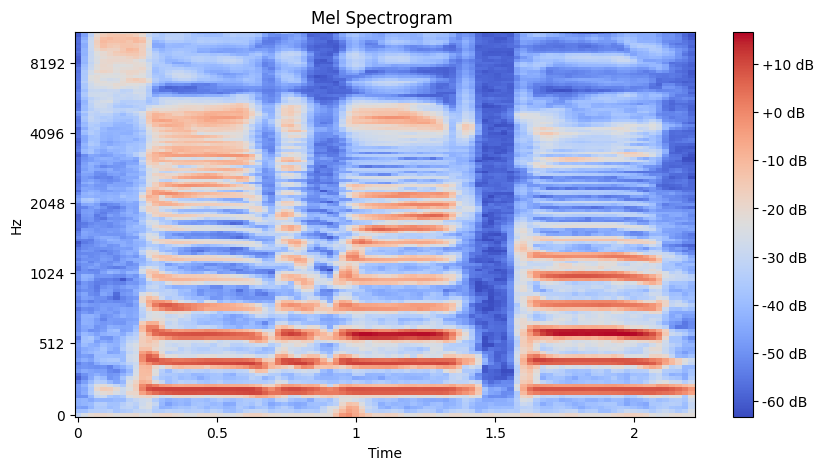

In [105]:
#plotting one sample

plt.figure(figsize = (10, 5))
spect = librosa.feature.melspectrogram(y = data, sr= sr, n_mels = 128, fmax = 10000)
log_spect = librosa.power_to_db(spect) #now in db, log le liya
librosa.display.specshow(log_spect, y_axis = 'mel', sr = sr, x_axis = 'time')
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

